<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/Etv2_MEF_EB_motifs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing chromVAR and SeATAC on detecting differential motifs in Etv2 induced reprogramming and ES/EB differentiation


In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # required by R package ComplexHeatmap 

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
system('apt-get install libmagick++-dev', intern = TRUE) # required by magick

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [5] "  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [6] "  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [7] "  libcupsfilters1 libcupsimage2 libdjvulibre-dev libdjvulibre-text"                                              

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 
  'dplyr',
  'BSgenome.Mmusculus.UCSC.mm10',
  'magick', 'patchwork',
  'chromVAR', 'motifmatchr'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'BSgenome.Mmusculus.UCSC.mm10',
  'EnrichedHeatmap', 'magick', 'patchwork', 'chromVAR', 'motifmatchr'

also installing the dependencies ‘formatR’, ‘plyr’, ‘pracma’, ‘AnnotationDbi’, ‘R.oo’, ‘R.methodsS3’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘iterators’, ‘lambda.r’, ‘futile.options’, ‘reshape2’, ‘poweRlaw’, ‘annotate’, ‘GO.db’, ‘R.utils’, ‘KEGGREST’, ‘plogr’, ‘sass’, ‘rtracklayer’, ‘XVector’, ‘clue’, ‘GlobalOptions’, ‘png’, ‘foreach’, ‘doParallel’, ‘rjson’, ‘shape’, ‘RCurl’, ‘GenomeInfoDbData’, ‘RcppEigen’, ‘BH’, ‘futile.logger’, ‘snow’, ‘Biobase’, ‘caTools’, ‘CNEr’, ‘DirichletMultinomial’, ‘gtools’, ‘RSQLite’, ‘seqLogo’, ‘TFMPvalue’, ‘XML’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘

In [ ]:
library(devtools)

Loading required package: usethis



### Install SeATAC from github

In [ ]:
install_github('gongx030/seatac@v0.4.0', force = TRUE, quiet = FALSE)
reload(pkgload::inst("seatac"))
library(seatac)

rlang        (1.0.1 -> 1.0.2  ) [CRAN]
fansi        (1.0.2 -> 1.0.3  ) [CRAN]
Rcpp         (1.0.8 -> 1.0.8.3) [CRAN]
tfautograph  (NA    -> 0.3.2  ) [CRAN]
config       (NA    -> 0.3.1  ) [CRAN]
withr        (2.4.3 -> 2.5.0  ) [CRAN]
here         (NA    -> 1.0.1  ) [CRAN]
RcppTOML     (NA    -> 0.1.7  ) [CRAN]
zeallot      (NA    -> 0.1.0  ) [CRAN]
tfruns       (NA    -> 1.5.0  ) [CRAN]
tensorflow   (NA    -> 2.8.0  ) [CRAN]
reticulate   (NA    -> 1.24   ) [CRAN]
keras        (NA    -> 2.8.0  ) [CRAN]
abind        (NA    -> 1.4-5  ) [CRAN]
gplots       (NA    -> 3.1.1  ) [CRAN]
tfdatasets   (NA    -> 2.7.0  ) [CRAN]
tfprobabi... (NA    -> 0.15.0 ) [CRAN]


Installing 17 packages: rlang, fansi, Rcpp, tfautograph, config, withr, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, gplots, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmpz1J0yn/remotes4061c3eb76/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Install other non-CRAN packages

In [ ]:
devtools::install_github("GreenleafLab/chromVARmotifs")

openssl (1.4.6 -> 2.0.0) [CRAN]


Installing 1 packages: openssl

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmpz1J0yn/remotes4024f3814e/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Load R packages

In [ ]:
library(GenomicRanges)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(ggplot2)
library(circlize)
library(magick)
library(patchwork)
library(chromVAR)
library(motifmatchr)
library(chromVARmotifs)
library(ggrepel)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

In [ ]:
Sys.time() - start_time

Time difference of 45.41221 mins

## Parameters

In [ ]:
ARGS <- list(
  fragment_size_range_max = 640L,
  fragment_size_interval = 10L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 5L,
  step_size = 200L,
  log_ratio_cutoff = 0.2
)

## Load BAM files

In [ ]:
remote_bam_files <- c(
  EB_NoDox_D25 = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam',
  EB_Dox_D25_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam',
  MEF_NoDox = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam',
  MEF_Dox_D7_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam'
)
for (i in 1:length(remote_bam_files)){
  sprintf('wget -cx %s', remote_bam_files[i]) %>% system()
}

In [ ]:
local_bam_files <- gsub('https://', './', remote_bam_files)
all(file.exists(local_bam_files))

[1] TRUE

## Load bed files

In [ ]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (i in 1:length(remote_bed_files)){
  sprintf('wget -cx %s', remote_bed_files[i]) %>% system()
}
local_bed_files <- gsub('https://', './', remote_bed_files)
all(file.exists(local_bed_files))

[1] TRUE

## chromVAR analysis of EB data

In [ ]:
data('homer_pwms') # 321 TF motifs from Homer database

In [ ]:
gr0 <- lapply(local_bed_files[c('EB_NoDox_D25', 'EB_Dox_D25_Flk1pos')], function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]

In [ ]:
counts <- count_reads(
  resize(gr0, width = ARGS[['block_size']], fix = 'center'),
  local_bam_files[c('EB_NoDox_D25', 'EB_Dox_D25_Flk1pos')], 
  genome = BSgenome.Mmusculus.UCSC.mm10,  
  fragment_size_range = c(0, 10000)
)

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



In [ ]:
se_EB <- SummarizedExperiment(
  assays = list(counts = counts),
  rowRanges = gr0,
  colData = data.frame(group = c('EB_NoDox_D25', 'EB_Dox_D25_Flk1pos'))
)
se_EB <- addGCBias(se_EB, genome = BSgenome.Mmusculus.UCSC.mm10)
se_EB <- se_EB[rowSums(assays(se_EB)$counts > 0) >= 2]

In [ ]:
motif_ix <- matchMotifs(homer_pwms, se_EB, genome = 'mm10')

In [ ]:
dev_EB <- computeDeviations(object = se_EB, annotations = motif_ix)

In [ ]:
v_EB <- computeVariability(dev_EB)

## chromVAR analysis on MEF data

In [ ]:
gr0 <- lapply(local_bed_files[c('MEF_NoDox', 'MEF_Dox_D7_Flk1pos')], function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]

In [ ]:
counts <- count_reads(
  resize(gr0, width = ARGS[['block_size']], fix = 'center'),
  local_bam_files[c('MEF_NoDox', 'MEF_Dox_D7_Flk1pos')], 
  genome = BSgenome.Mmusculus.UCSC.mm10,  
  fragment_size_range = c(0, 10000)
)

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



In [ ]:
se_MEF <- SummarizedExperiment(
  assays = list(counts = counts),
  rowRanges = gr0,
  colData = data.frame(group = c('MEF_NoDox', 'MEF_Dox_D7_Flk1pos'))
)
se_MEF <- addGCBias(se_MEF, genome = BSgenome.Mmusculus.UCSC.mm10)
se_MEF <- se_MEF[rowSums(assays(se_MEF)$counts > 0) >= 2]

In [ ]:
motif_ix <- matchMotifs(homer_pwms, se_MEF, genome = 'mm10')

In [ ]:
dev_MEF <- computeDeviations(object = se_MEF, annotations = motif_ix)

In [ ]:
v_MEF <- computeVariability(dev_MEF)

## Load motif results for MEF and ES/EB ATAC-seq data. This results were computed by using the following scripts:

* MEF: https://github.com/gongx030/seatac_project/blob/master/config/seatac_MEF_all_motifs.r
* EB: https://github.com/gongx030/seatac_project/blob/master/config/seatac_EB_all_motifs.r

We used the results of `vae_latent=5`

In [ ]:
remote_EB_result_file <- 'https://s3.msi.umn.edu/gongx030/projects/seatac_project/config/seatac_EB_all_motifs/results.tsv'
local_EB_result_file <- gsub('https://', './', remote_EB_result_file)
system(sprintf('wget -cx %s', remote_EB_result_file))
remote_MEF_result_file <- 'https://s3.msi.umn.edu/gongx030/projects/seatac_project/config/seatac_MEF_all_motifs/results.tsv'
local_MEF_result_file <- gsub('https://', './', remote_MEF_result_file)
system(sprintf('wget -cx %s', remote_MEF_result_file))

In [ ]:
gr <- NULL
gr <- rbind(gr, read.table(local_EB_result_file, header = TRUE, sep = '\t'))

In [ ]:
x <- read.table(remote_EB_result_file, header = TRUE, sep = '\t')
sprintf('wget -O %s %s', './EB.tsv', x$remote_output_file[1]) %>% system()
res_EB <- read.table('./EB.tsv', header = FALSE, sep = '\t')
x <- read.table(remote_MEF_result_file, header = TRUE, sep = '\t')
sprintf('wget -O %s %s', './MEF.tsv', x$remote_output_file[1]) %>% system()
res_MEF <- read.table('./MEF.tsv', header = FALSE, sep = '\t')

In [ ]:
res <- rbind(
  cbind(res_EB, group = 'EB'),
  cbind(res_MEF, group = 'MEF')
)

In [ ]:
gr <- GRanges(
  seqnames = res[, 1],
  ranges = IRanges(res[, 2], res[, 3]),
  strand = res[, 5],
  pvalue_z = res[, 6],
  padj = res[, 7],
  nucleosome_treatment = res[, 8],
  nucleosome_control = res[, 9],
  log_ratio = res[, 10],
  motif = res[, 11],
  group = res[, 12]
)

In [ ]:
df <- data.frame(
  padj = gr$padj,
  log_ratio = gr$log_ratio,
  motif = gr$motif,
  group = gr$group
) %>%
  mutate(motif = factor(motif, names(homer_pwms))) %>%
  group_by(group, motif) %>%
  summarize(
    up = sum(padj < 0.05 & log_ratio > ARGS[['log_ratio_cutoff']]) / n() * 100,
    down = sum(padj < 0.05 & log_ratio < -ARGS[['log_ratio_cutoff']]) / n() * 100
  ) %>%
  mutate(motif_name = case_when(
    motif == 'Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)' ~ 'Etv2',
    motif == 'AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer' ~ 'AP1',
    motif == 'Brachyury(T-box)/Mesoendoderm-Brachyury-ChIP-exo(GSE54963)/Homer' ~ 'T',
    motif == 'Elk1(ETS)/Hela-Elk1-ChIP-Seq(GSE31477)/Homer' ~ 'Elk1',
    motif == 'ERG(ETS)/VCaP-ERG-ChIP-Seq(GSE14097)/Homer' ~ 'ERG',
    motif == 'Fli1(ETS)/CD8-FLI-ChIP-Seq(GSE20898)/Homer' ~ 'Fli1',
    motif == 'ETV1(ETS)/GIST48-ETV1-ChIP-Seq(GSE22441)/Homer' ~ 'Etv1',
    motif == 'PU.1(ETS)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer' ~ 'PU.1',
    motif == 'GABPA(ETS)/Jurkat-GABPa-ChIP-Seq(GSE17954)/Homer' ~ 'GABPA',
    motif == 'Ets1-distal(ETS)/CD4+-PolII-ChIP-Seq(Barski_et_al.)/Homer' ~ 'Ets1',
    motif == 'Gata1(Zf)/K562-GATA1-ChIP-Seq(GSE18829)/Homer' ~ 'Gata1',
    motif == 'Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer' ~ 'Fosl2',
    motif == 'Tbx5(T-box)/HL1-Tbx5.biotin-ChIP-Seq(GSE21529)/Homer' ~ 'Tbx5',
    motif == 'Mef2c(MADS)/GM12878-Mef2c-ChIP-Seq(GSE32465)/Homer' ~ 'Mef2c',
    TRUE ~ ''
  ))  %>% 
  cbind(
    chromvar_padj = c(v_EB$p_value_adj, v_MEF$p_value_adj),
    chromvar_diff = c(assays(dev_EB)$z[, 2] - assays(dev_EB)$z[, 1], assays(dev_MEF)$z[, 2] - assays(dev_MEF)$z[, 1])
  ) %>%
  mutate(
    chromvar_log10padj = -log10(chromvar_padj + 1e-100),
    seatac_diff = down - up,
    chromvar_group = case_when(
      chromvar_diff >= 0 ~ 'more_abundant',
      chromvar_diff < 0 ~ 'less_abundant'
    )
  ) %>%
  mutate(motif_group = case_when(
    grepl('ETS', motif, ignore.case = TRUE) ~ 'ETS'
  ))

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


## Compare the changes of nucleosome and read desnity of ESTs motifs 

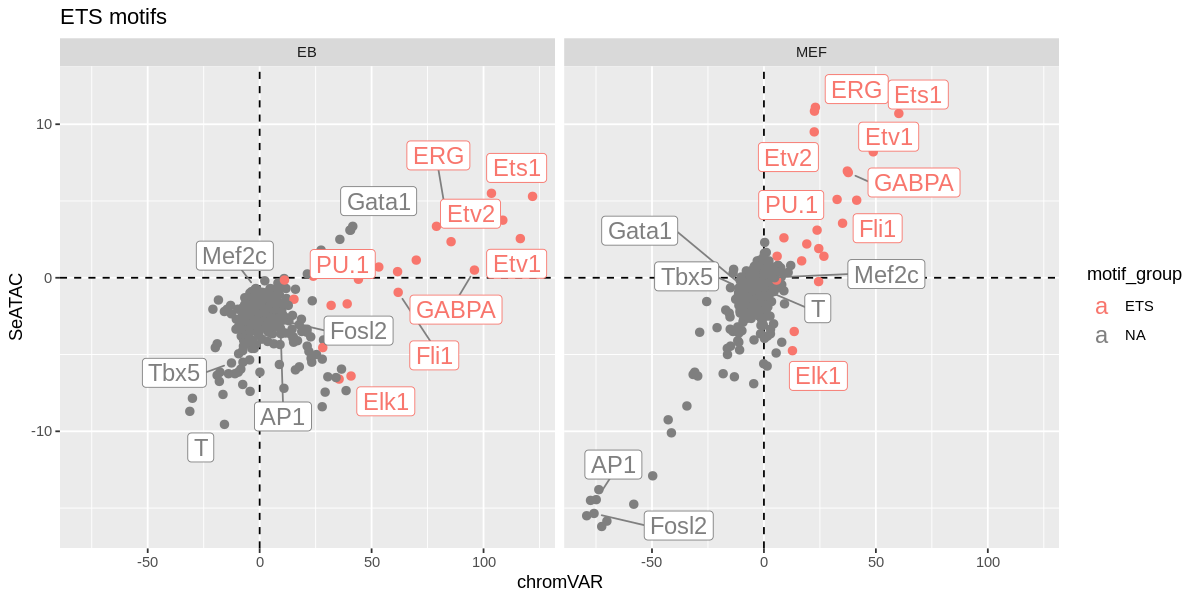

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)
df %>%
  ggplot(aes(x = chromvar_diff, y = seatac_diff, color = motif_group)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    geom_vline(xintercept = 0, linetype = 'dashed') +
    geom_point(size = 2) +
    geom_label_repel(aes(label = motif_name), box.padding   = 0.35,  point.padding = 0.5, segment.color = 'grey50', max.overlaps = 1000, size = 5) +
    facet_grid(. ~ group) +
    xlab('chromVAR') + ylab('SeATAC') +
    ggtitle('ETS motifs')

## SessionInfo

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggrepel_0.9.1                      chromVARmotifs_0.2.0              
 [3] motifmatchr_1.16.0                 chromVAR_1.16.0                   
 [5] patchwork_1.1.1                    magick_2.7.3                      
 [7] circlize_0.4.14 

In [ ]:
Sys.time() - start_time

Time difference of 3.461688 hours